# Part 1 

In [40]:
### use the funtion 
from mymodule import check_df, find_categorical_columns, binary_columns_find

In [ ]:
### 1. Import the necessary libraries 
### Importieren Sie die notwendigen Bibliotheken 

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
### 2 .Print first 5 row of the dataset
### Geben Sie die ersten 5 Zeilen des Datensatzes aus.

In [4]:
df = pd.read_csv('Salary Data.csv')

In [5]:
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [ ]:
## 3 .Use the check_df function to analyze the dataset
###Verwenden Sie die Funktion check_df, um den Datensatz zu analysieren

In [41]:
check_df(df)

##################### Shape #####################
(40, 2)
##################### Duplicate Values #####################
0
##################### NA #####################
Experience Years    0
Salary              0
dtype: int64
##################### Types #####################
Experience Years    float64
Salary                int64
dtype: object
##################### Head #####################
   Experience Years  Salary
0               1.1   39343
1               1.2   42774
2               1.3   46205
##################### Unique Values #####################
Experience Years    38
Salary              40
dtype: int64


In [7]:
### 2.Activate the code below and analyze the distribution
### Aktivieren Sie den folgenden Code und analysieren Sie die Verteilung.

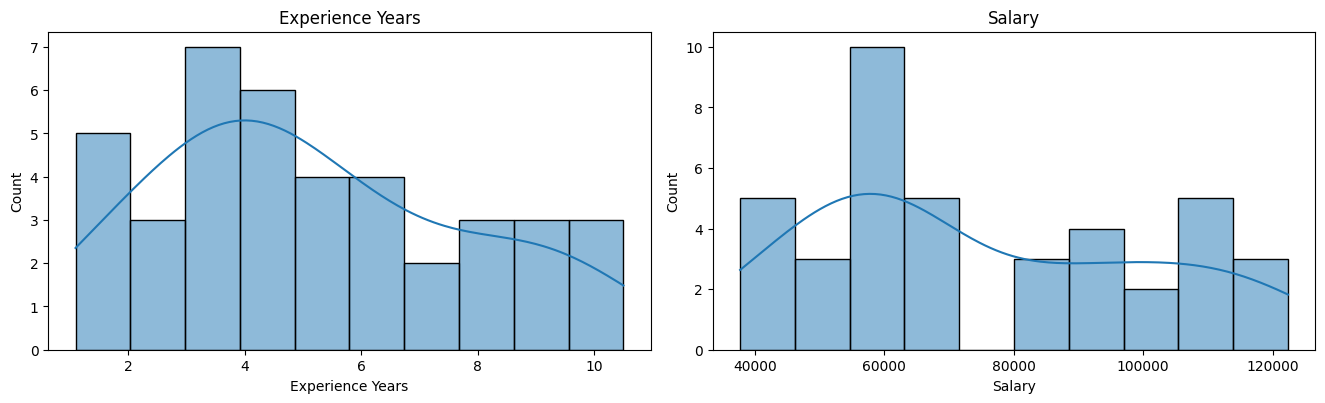

In [8]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(column)
plt.tight_layout()
plt.show()

In [9]:
### Find the correlation between Salary and years of experience using the corr method
## Finden Sie die Korrelation zwischen Gehalt  und Berufsjahren mit der Methode corr

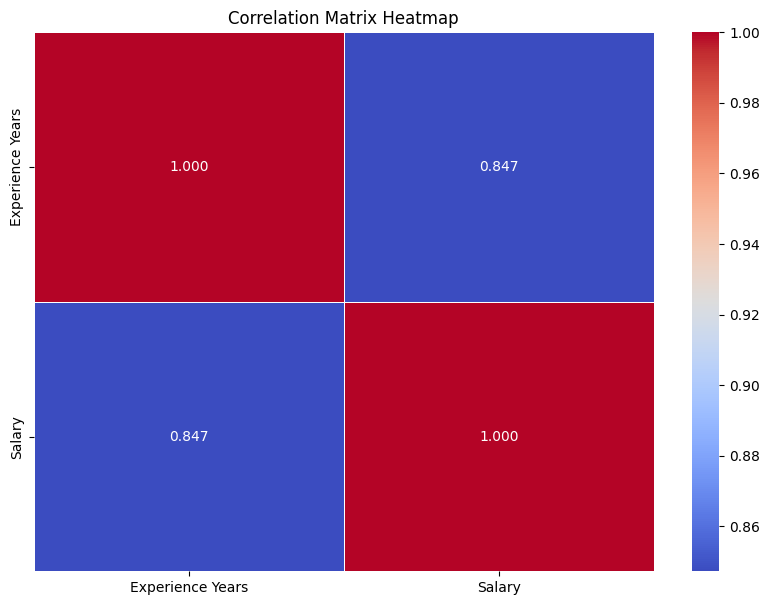

In [10]:
correlation_matrix = df.corr(method= 'kendall')
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:

### Analyze the correlation between two columns visually
### Analysieren Sie die Korrelation zwischen zwei Spalten visuell.

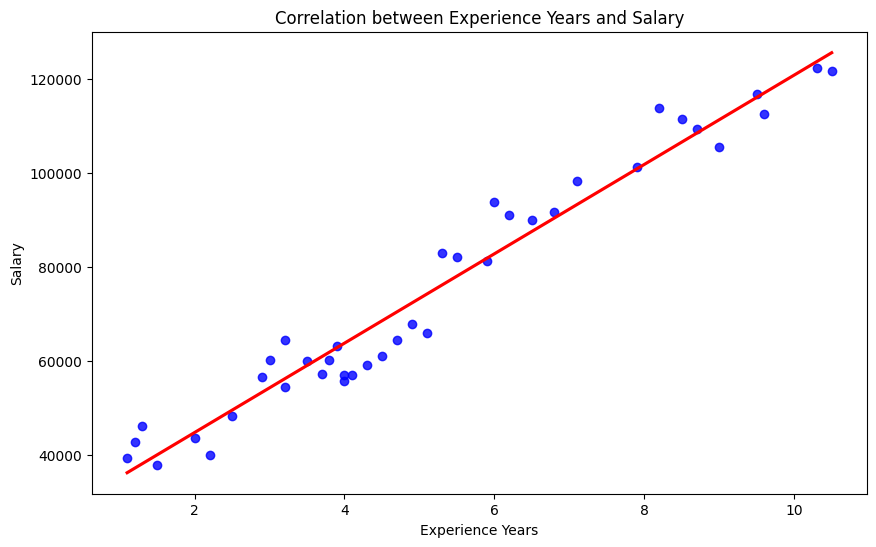

In [12]:
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.regplot(x='Experience Years', y='Salary', data=df, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Correlation between Experience Years and Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')

plt.show()

In [13]:
###  Visually find the outliers in the 'Experience Years' using a boxplot.
### Finden Sie visuell die Ausreißer in den 'Berufsjahren' mit einem Boxplot

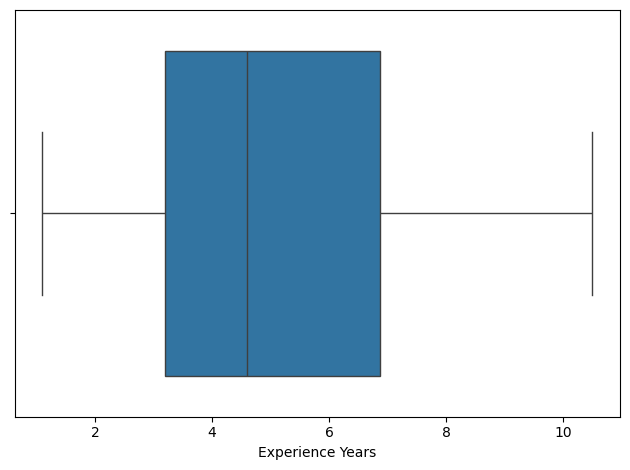

In [14]:
sns.boxplot(x=df['Experience Years'], data=df)
plt.tight_layout() 
plt.show()

In [19]:
### Calculate the mean and median salary.
### Berechnen Sie das Durchschnitts- und Median-Gehalt.

74743.625
64472.5


In [42]:
print(df['Salary'].mean())
print(df['Salary'].median())

74743.625
64472.5


# Part  2

In [ ]:
### 1. Split the data into four pieces: train_x, test_x, train_y, and test_y . (The target value is the 'Salary')
## Teilen Sie die Daten in vier Teile auf: train_x, test_x, train_y und test_y. ('Der Zielwert ist die 'Salary')

In [21]:
X = df.drop('Salary', axis=1)
y = df[["Salary"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [22]:
### Train  the model
model = DecisionTreeRegressor()

In [24]:
## Analyze the parameter that you can arrange.
## Analysieren Sie den Parameter, den Sie anordnen können
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
### Analyze how scores change with max_depth in the range of 1 to 30 and find the best value for the model.
## Analysieren Sie, wie sich die Werte mit der maximalen Tiefe im Bereich von 1 bis 30 ändern, und finden Sie den besten Wert für das Model

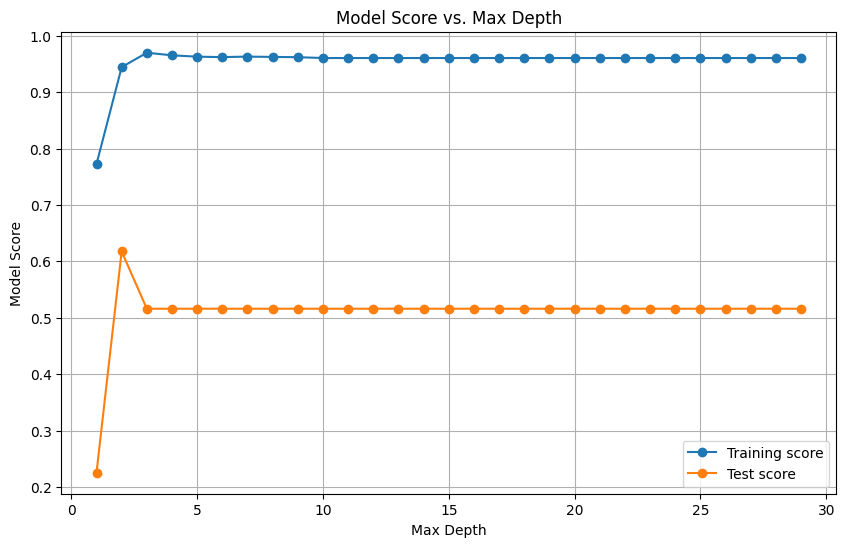

In [23]:
max_depth_range = np.arange(1, 30) 
train_scores, test_scores = [], []
for max_depth in max_depth_range:
    dtree = DecisionTreeRegressor(max_depth=max_depth, random_state=99)
    train_score = np.mean(cross_val_score(dtree, X_train, y_train, scoring ='r2', cv=3))
    train_scores.append(train_score)
    test_score = np.mean(cross_val_score(dtree, X_test, y_test, scoring ='r2', cv=3))
    test_scores.append(test_score)
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, label='Training score', marker='o')
plt.plot(max_depth_range, test_scores, label='Test score', marker='o')
plt.title('Model Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Model Score')
plt.legend()
plt.grid(True)
plt.show()

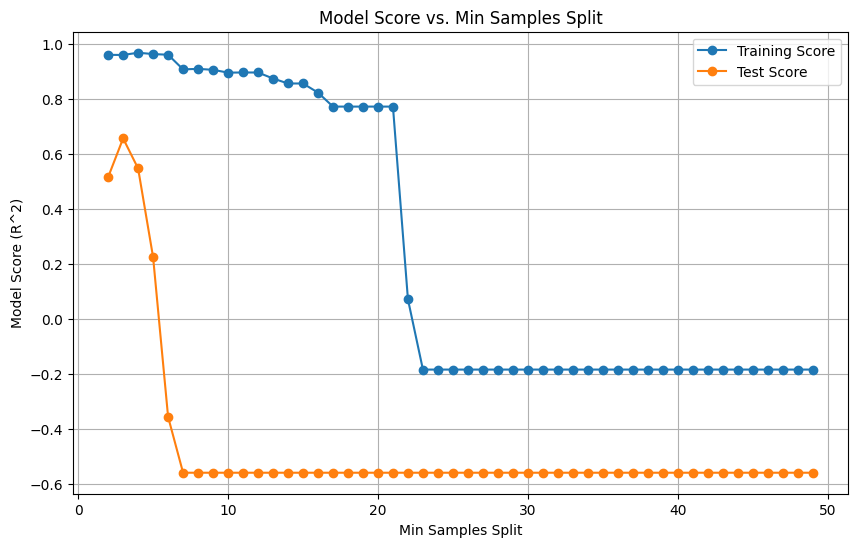

In [31]:
### Activate the code and analyze how the model's score changes with different values of min_samples_split.
### Aktivieren Sie den Code und analysieren Sie, wie sich die Punktzahl des Modells mit verschiedenen Werten von min_samples_split ändert

min_samples_split_values = np.arange(2, 50)
train_scores, test_scores = [], []
for min_samples_split in min_samples_split_values:
    dtree = DecisionTreeRegressor(min_samples_split=min_samples_split, random_state=99)
    train_score = np.mean(cross_val_score(dtree, X_train, y_train, scoring='r2', cv=3))
    train_scores.append(train_score)
    test_score = np.mean(cross_val_score(dtree, X_test, y_test, scoring='r2', cv=3))
    test_scores.append(test_score)
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_scores, label='Training Score', marker='o')
plt.plot(min_samples_split_values, test_scores, label='Test Score', marker='o')
plt.title('Model Score vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('Model Score (R^2)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
### Train the model using a max_depth range of 1 to 5 and a min_samples_split range from 2 to 30
### Trainieren Sie das Modell mit einem max_depth-Bereich von 1 bis 5 und einem min_samples_split-Bereich von 2 bis 30

In [33]:
dtree = DecisionTreeRegressor(random_state=99)
param_grid = {
    'max_depth':  np.arange(3, 10) ,
    'min_samples_split': np.arange(1, 20),
}
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 133 candidates, totalling 665 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=99),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='r2', verbose=1)

In [34]:
best_dtree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'min_samples_split': 2}


In [ ]:
### Check the model's score on the training dataset.
### Überprüfen Sie die Punktzahl des Modells auf dem Trainingsdatensatz.

In [35]:

y_pred_train = best_dtree.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 7058127.3984375
R^2 Score: 0.9898315490762665


In [ ]:
### Check the model score in training dataset 

In [36]:

y_pred = best_dtree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 41944452.00086805
R^2 Score: 0.8583113981297025


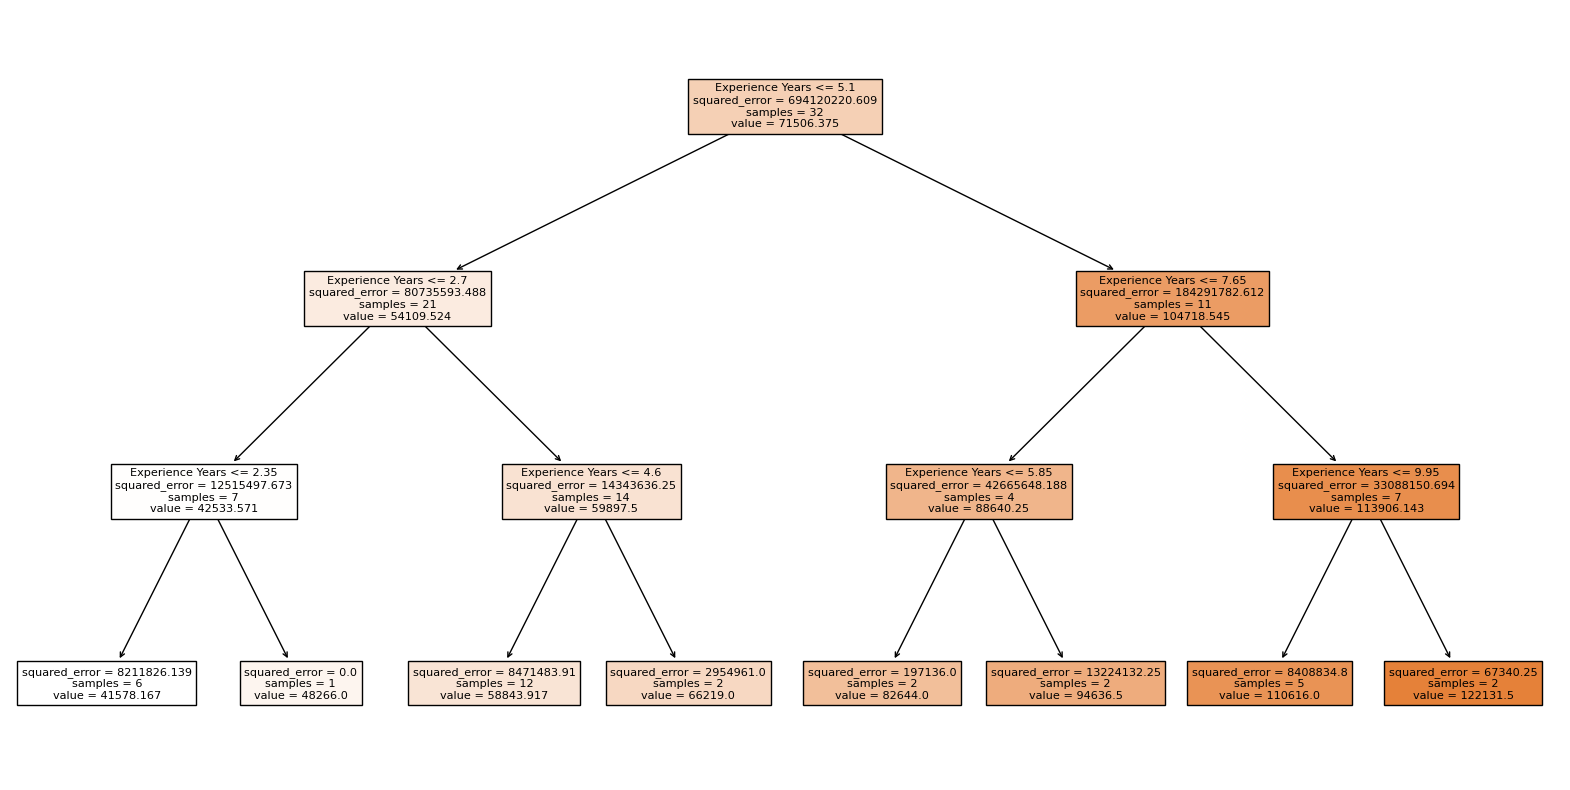

In [37]:
###  Print the descion tree   and discees the split point in  group 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dtree, feature_names=X.columns, filled=True)
plt.show()